In [1]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [2]:
#mongodb+srv://naman:<password>@cluster0.mj77w.mongodb.net/<dbname>?retryWrites=true&w=majority
import pymongo
client = pymongo.MongoClient("mongodb://127.0.0.1:27017")
mydb = client["tags"]
mycol = mydb["row"]

In [3]:
mytree2 = ET.parse('Posts.xml')


In [4]:
myroot2 = mytree2.getroot()
print(myroot2[1])
cnt = 0

<Element 'row' at 0x7f3137fb6a90>


In [5]:
print(len(myroot2))
#myroot2 = myroot2[:10000]

3380601


In [6]:
print(type(myroot2[0].attrib.get('Tags')))

<class 'str'>


In [8]:
tag_list = []
for lol in myroot2:
    try:
        y = lol.attrib.get('Tags')
        if lol.attrib.get('Tags') == None:
            continue
        lol.attrib['Tags'] = lol.attrib.get('Tags').replace('<',' ')
        lol.attrib['Tags'] = lol.attrib.get('Tags').replace('>',' ')
        tag_list.append(lol.attrib['Tags'])
        #print(lol.attrib.get('Tags'))
    except :
        continue
        #print(type(lol.attrib.get('Tags')))

In [9]:
whiteSpaceRegex = " "
tag_list2 = []
for string in tag_list:
        words = string.split(whiteSpaceRegex)
        for t in words:
            tag_list2.append(t)

In [10]:
len(tag_list2)

9868416

In [11]:
from pandas import DataFrame
df = DataFrame(tag_list2)

In [12]:
df

,0
0,
1,python
2,
3,xml
4,
...,...
9868411,
9868412,dplyr
9868413,
9868414,tidyverse


In [13]:
dict_1 =dict(df[0].value_counts())

In [14]:
#dict_1 .most_common(20)
key_list = []
val_list = []
for key1 in dict_1:
    key_list.append(key1)
    val_list.append(dict_1[key1])
    

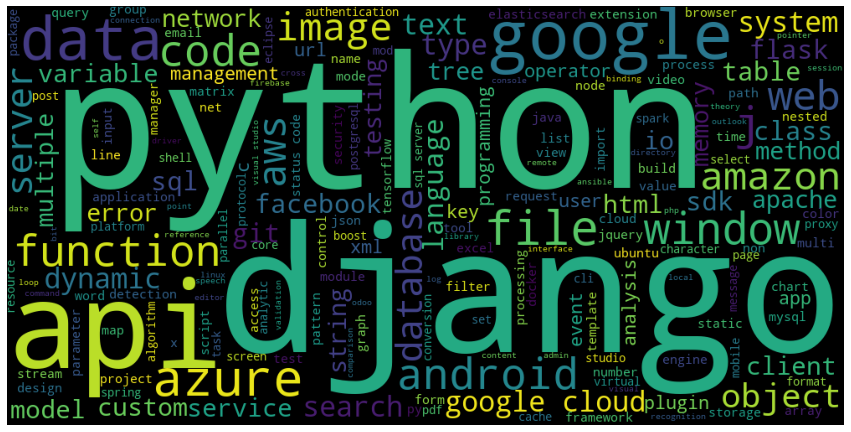

In [17]:
#convert list to string and generate
from wordcloud import WordCloud, STOPWORDS 
unique_string=(" ").join(key_list)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [18]:
val_list = val_list[1:11]  # top 10 tags
key_list = key_list[1:11]

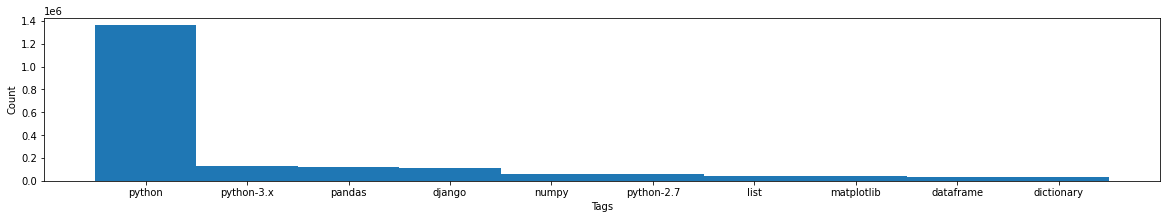

In [19]:
plt.figure(figsize=(20, 3))
plt.bar(key_list, val_list,  width = 1)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()